# Comparing Feature Extraction and Classification Approaches
**Introduction**

In this notebook, we are going to compare the performance and prediction accuracy of two classfication methods, Fisher's Linear Discriminant (LDA) and Naïve Bayes classifier, with two different feature extraction approaches, forward search and Priciple Component Analysis (PCA).

A garment manufacturing operation dataset from UCI Machine Learning Repository was selected to predict worker productivity. Since, garment manufacturing is a labor-intensive operation, predicting productivity with feature extraction approaches allows the companies to keep track of the operational efficiency within factories and understand the factors affecting worker productivity. 

There are 1197 data samples in this dataset of which the first 800 data was used for training and the remaining data is used for testing. Data description illustrates the attributes of the preprocessed data. For simplicity, only numeric data was used. This data is shown in number 7 – 14, inclusive.

**Data Description**

1. date: Date in MM-DD-YYYY
2. quarter: A portion of the month. A month was divided into four quarters
3. department: Associated department with the instance
4. day: Day of the Week
5. Team_no: Associated team number with the instance
6. targeted_productivity: Targeted productivity set by the Authority for each team for each day.
7. smw: Standard Minute Value, it is the allocated time for a task
8. wip: Work in progress. Includes the number of unfinished items for products
9. Over_time: Represents the amount of overtime by each team in minutes
10. incentive: The amount of financial incentive (in BDT) that enables or motivates a particular course of action.
11. Idle_time: The amount of time when the production was interrupted due to several reasons
12. Idle_men: The number of workers who were idle due to production interruption
13. no_of_style_change: Number of changes in the style of a particular product
14. No_of_workers: Number of workers in each team
15. actual_productivity: The actual % of productivity that was delivered by the workers. It ranges from 0-1

In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# imports for plotting results
import matplotlib.pyplot as plt
import seaborn as sns  # Used to plot the confusion matrix as a heat map. Need to install not on computer.

import time

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

**Data Preprocessing**

To facilitate the classification, data preprocessing was performed. First, attributes with non-numeric value (Attribute 1 to 6) are removed. Missing values in the attribute of wip (Work in progress), which indicates the number of unfinished products, were then filled with 0.



In [2]:
data = pd.read_csv("garments_worker_productivity.csv")  # Import data
print(data.head())
data = data.fillna(0)  # Fills N/A values with zeroes
data = data.values  # Converting data to a numpy representation of the dataframe

       date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0        

In [3]:
# Data Preparation
x_raw = data[:, 6:-1]
x_raw = np.array(x_raw, dtype=float)
x_train = x_raw[:800, :]  # First 800 rows used for training
x_test = x_raw[800:, :]  # Remainder of the rows used for testing

For the analysis, the column representing attributes of the actual percentage of worker productivity in the original data was replaced with a column containing binary values (1,0) where 1 represents a point when the actual productivity is larger than the targeted productivity, and 0 otherwise. I.e., 0=does not meet productivity, 1=meets productivity.

In [4]:
def class_input_data(xc):
    for i in range(len(xc)):
        if xc[i] > data[i, 5]:
            xc[i] = 1
        else:
            xc[i] = 0
    return xc

In [5]:
# Classifying data based on whether the workers meet productivity (assigned 1) or not (assigned 0)
xc = data[:, -1:]
xc = np.array(xc, dtype=float).ravel()

xc_train = data[:800, -1:]  # actual productivity of the first 800 rows
xc_train = np.array(xc_train, dtype=float).ravel()

xc_test = data[800:, -1:]  # actual productivity values of the last 397 rows
xc_test = np.array(xc_test, dtype=float).ravel()

xc = class_input_data(xc)
xc_train = class_input_data(xc_train)
xc_test = class_input_data(xc_test)

**Classification**

Fisher’s Linear Discriminant (FLD) classification, referred to as LDA within, and Naive Bayes classification were applied to the dataset after extracting key features using PCA and Feature Selection methods. Training time and testing time are recorded for comparison.

In [6]:
def LDA_prediction(training_data, target_training_class, input_data):
    lda = LinearDiscriminantAnalysis()

    # Training
    start_time = time.time()
    lda.fit(training_data, target_training_class)
    end_time = time.time()
    training_time = end_time - start_time

    # Testing
    start_time = time.time()
    prediction = lda.predict(input_data)
    end_time = time.time()
    testing_time = end_time - start_time
    return prediction, training_time, testing_time

In [7]:
# Naive Bayes Classifier
def naive_bayes_prediction(training_data, target_training_class, input_data):
    clf = GaussianNB()

    # Training
    start_time = time.time()
    clf.fit(training_data, target_training_class)
    end_time = time.time()
    training_time = end_time - start_time

    # Testing
    start_time = time.time()
    prediction = clf.predict(input_data)
    end_time = time.time()
    testing_time = end_time - start_time

    return prediction, training_time, testing_time

**Confusion Matrix**

A confusion matrix function was created to plot the results of the prediction and return the accuracy. This matrix shows the True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (NP) results. 

In [8]:
# Plotting confusion matrix
def confusion_matrix_results(actual_results, predicted_results):
    matrix = confusion_matrix(actual_results, predicted_results, labels=[1.0, 0.0])
    print("Classification report is as follows:")
    print("")
    print(classification_report(actual_results, predicted_results, labels=[1.0, 0.0]))

    # Derivations from the confusion matrix. True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
    TP, FN, FP, TN = confusion_matrix(actual_results, predicted_results, labels=[1.0, 0.0]).ravel()

    TPR = round((TP / (TP + FN)) * 100, 1)  # True positive rate (how often it predicts 'yes' when it's 'yes')
    TNR = round((TN / (TN + FP)) * 100, 1)  # True negative rate (how often it predicts 'no' when it's 'no')
    PPV = round((TP / (TP + FP)) * 100,
                1)  # precision or positive prediction value (how hoften is it correct when it predicts 'yes')
    NPV = round((TN / (TN + FN)) * 100, 1)  # Negative prediction value
    FPR = round((FP / (FP + TN)) * 100, 1)  # False positive rate (how often it predicts 'yes' when it's 'no')
    FNR = round((FN / (TP + FN)) * 100, 1)  # False negative rate (how often it predicts 'no' when it's 'yes')
    FDR = round((FP / (TP + FP)) * 100, 1)  # False discovery rate
    accuracy = round(((TP + TN) / (TP + FP + FN + TN)) * 100, 1)  # how often is the classifier right
    # Note: Values above converted to percentages

    rates_matrix = [[TPR, FNR], [FPR, TNR]]  # results of the confusion matrix as percetages of the statistical rates
    statistical_matrix = [[TPR, FNR], [TNR, FPR]]  # results of the confusion matrix arranged as TPR and FPR

    # Heatmap plot
    # Results of the confusion matrix

    plt.rc('font', size=20)  # controls default text size
    plt.rc('axes', titlesize=20)  # fontsize of the title
    plt.rc('axes', labelsize=20)  # fontsize of the x and y labels
    plt.rc('xtick', labelsize=20)  # fontsize of the x tick labels
    plt.rc('ytick', labelsize=20)  # fontsize of the y tick labels
    plt.rc('legend', fontsize=20)  # fontsize of the legend

    # Heatmap plot
    # Results of the confusion matrix
    plot1 = plt.figure()  # first plot showing confusion matrix observations
    g1 = sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', square=True)
    g1.set_title('Confusion Matrix of the Number of Observations \n Using 5 Principal Components or Features',
                 weight='bold')
    g1.set_xlabel('Predicted Values')
    g1.set_ylabel('Actual Values')

    g1.xaxis.set_ticklabels(['1', '0'])
    g1.yaxis.set_ticklabels(['1', '0'])
    # Plotting the statistical results of the confusion matrix
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False,
                                 figsize=(11, 4))  # second plot showing confusion matrix results as percentages

    g2 = sns.heatmap(rates_matrix, annot=True, cmap='Blues', fmt='g', ax=ax1, cbar=False, square=True)
    for t in g2.texts: t.set_text(
        t.get_text() + " %")  # adding a percentage symbol to the plot by iterating over the results
    g2.xaxis.set_ticklabels(['1', '0'])
    g2.yaxis.set_ticklabels(['1', '0'])

    g3 = sns.heatmap(statistical_matrix, annot=True, cmap='Blues', fmt='g', ax=ax2, square=True)
    for t in g3.texts: t.set_text(
        t.get_text() + " %")  # adding a percentage symbol to the plot by iterating over the results
    g3.xaxis.set_ticklabels(['TPR', 'FNR'])
    g3.yaxis.set_ticks([])

    f.suptitle('Confusion Matrix Results and TPR and FNR as Percentages',
               weight='bold')
    f.text(0.5, 0.04, 'Predicted Values', ha='center')
    f.text(0.04, 0.5, 'Actual Values', va='center', rotation='vertical')

    plt.show()
    return accuracy

**Principle Component Analysis (PCA)**

For PCA, the selected data was split into training and testing data with 800 datasets for training and 397 datasets for testing. Eigenvectors and Eigenvalues of the training dataset were calculated within the PCA function, and the principal components determined resulting in a reduced matrix containing the principal scores. These scores were input into the LDA classifier function along with the testing data. The resulting output was the classes of the testing data and the time it took to train and test the datasets using an LDA classifier. Similarly, these principal scores were input in the Naïve Bayes classifier function. The resulting output was the classes of the testing data and the time it took to train and test the datasets. Results were also plotted on a confusion matrix and accuracy using the different classifiers presented.

In [9]:
# pca function
def pca(raw_data, actual_training_class, actual_testing_class):
    # Principal Component Analysis
    x_mean = np.mean(raw_data, axis=0)
    x_mc = (raw_data - x_mean)
    x_cov = np.dot(x_mc.T, x_mc)
    D, E = np.linalg.eig(x_cov)  # Eigenvalues and corresponding eigenvectors

    # Sorting the eigenvalues and eigenvectors
    sorted_index = np.argsort(D)
    sorted_D = D[sorted_index]
    sorted_E = np.zeros((8, 8))
    index = 0
    for i in range(7, -1, -1):
        sorted_E[:, index] = E[:, sorted_index[i]]
        index = index + 1

    y = np.dot(x_mc, sorted_E)  # principal component outputs i.e. all principal component scores

    # Based on visual inspection, we shall keep features the first five features since
    # the eigenvalues are significantly large for those features.

    reduced_E = sorted_E[:, 0:5]  # reduced eigenvectors
    reduced_y = y[:, 0:5]  # reduced principal component outputs

    y_train = reduced_y[:800, :]
    y_test = reduced_y[800:, :]

    # Predicting outputs with LDA and Naive Bayes classifiers
    predicted_results_LDA, training_time_LDA, testing_time_LDA = LDA_prediction(y_train, actual_training_class, y_test)

    predicted_results_NB, training_time_NB, testing_time_NB = naive_bayes_prediction(y_train, actual_training_class,
                                                                                     y_test)

    # Confusion matrix and accuracy of the results using the different classifiers
    print('--- LDA Result ---\n')
    LDA_testing_accuracy = confusion_matrix_results(actual_testing_class,
                                                    predicted_results_LDA)  # Accuracy of the classifier as a percetage
    print('\n--- NB Result ---\n')
    NB_testing_accuracy = confusion_matrix_results(actual_testing_class,
                                                   predicted_results_NB)  # Accuracy of the classifier as a percetage

    return training_time_LDA, testing_time_LDA, LDA_testing_accuracy, training_time_NB, testing_time_NB, NB_testing_accuracy


**Feature Selection**

A forward search Feature Selection method was performed. Since 5 key attributes were used during PCA, our forward search method also extracted the 5 most significant attributes for analysis. A zero matrix was created and filled with the best features at the end of the function. These features were input into the LDA classifier and Naïve Bayes classifier functions with 800 datasets representing the training dataset and 397 representing the testing dataset. The resulting outputs were the class of the testing data and the time it took to train and test the datasets using the different classifiers.

In [10]:
# Feature selection (SFS)
def feature_selection(input_data, data_classes):
    selected_features = 5  # Using five because that is what was found to be the best with pca
    total_features = 8
    best_feature = 1000 * np.ones(selected_features)  # creating a list of 100's that represents the best five features.

    # Determine the best features. Must use the raw data
    for i in range(selected_features):
        # Create an array of zeros that will contain the five best features
        if i == 0:
            x_selection = np.zeros((input_data.shape[0], 1))
        else:
            x_selection = np.concatenate((x_selection, np.zeros((input_data.shape[0], 1))), axis=1)

        error = 10000 * np.ones(total_features)
        # Loop through the created array and add the best features from the raw data

        for j in range(total_features):
            # check if the feature 'j' has not been used
            if (not (j == best_feature[0] or j == best_feature[1]
                     or j == best_feature[2] or j == best_feature[3] or j == best_feature[4])):
                x_selection[:, i] = input_data[:, j]  # add the feature to the selection

                prediction, training_time_LDA, testing_time_LDA = LDA_prediction(x_selection, data_classes,
                                                                                 x_selection)  # Results were the same for naive bayes classifier so opted to use LDA.
                error[j] = sum(abs(prediction != data_classes))

        best_feature[i] = np.argmin(error)
        x_selection[:, i] = input_data[:, int(best_feature[i])]

    # Train the results using the best features from above. Data is split between training and testing
    x_selection_training = x_selection[:800, :]
    x_selection_testing = x_selection[800:, :]

    testing_class = data_classes[800:]
    training_class = data_classes[0:800]
    
    predicted_results_LDA, training_time_LDA, testing_time_LDA = LDA_prediction(x_selection_training, training_class,
                                                                                x_selection_testing)
    
    predicted_results_NB, training_time_NB, testing_time_NB = naive_bayes_prediction(x_selection_training,
                                                                                     training_class,
                                                                                     x_selection_testing)
    
    print("--- LDA Result ---\n")
    LDA_testing_accuracy = confusion_matrix_results(testing_class, predicted_results_LDA)
    end_time = time.time()
    LDA_error = sum(predicted_results_LDA != testing_class)
    
    print("\n--- NB Result ---\n")
    NB_testing_accuracy = confusion_matrix_results(testing_class, predicted_results_NB)
    NB_error = sum(predicted_results_NB != testing_class)
    return training_time_LDA, testing_time_LDA, LDA_testing_accuracy, training_time_NB, testing_time_NB, NB_testing_accuracy


**Classification Result**

The codes below print the result of the two classifications with PCA and feature selection.

--- LDA Result ---

Classification report is as follows:

              precision    recall  f1-score   support

         1.0       0.52      0.98      0.68       193
         0.0       0.88      0.14      0.24       204

    accuracy                           0.55       397
   macro avg       0.70      0.56      0.46       397
weighted avg       0.70      0.55      0.46       397



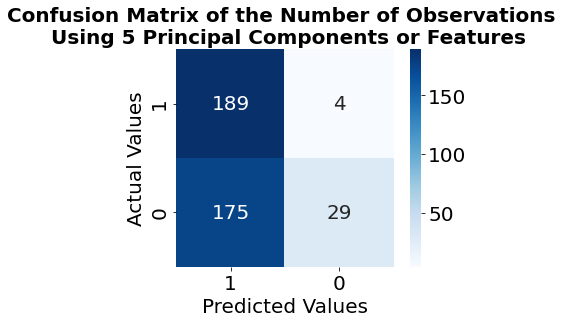

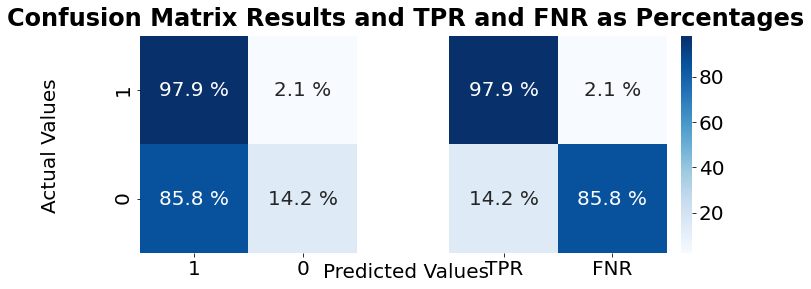


--- NB Result ---

Classification report is as follows:

              precision    recall  f1-score   support

         1.0       0.50      0.62      0.56       193
         0.0       0.54      0.42      0.47       204

    accuracy                           0.52       397
   macro avg       0.52      0.52      0.51       397
weighted avg       0.52      0.52      0.51       397



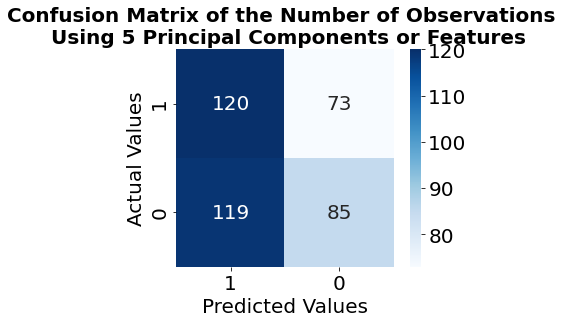

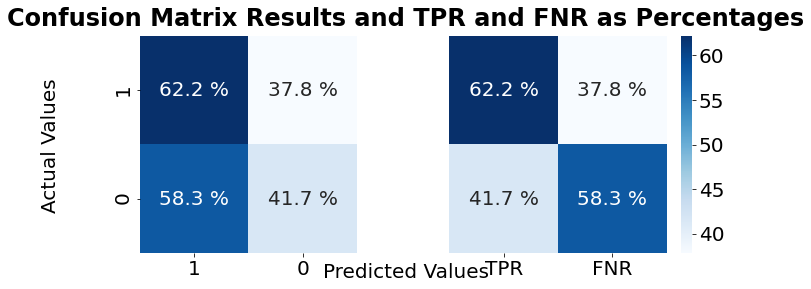

--- PCA-LDA Result ---
Training time:  2.09e-02 s
Testing time:  0.00e+00 s
Total computational time:  2.09e-02 s
Prediction accuracy:  54.9 %

--- PCA-NB Result ---
Training time:  2.00e-03 s
Testing time:  9.96e-04 s
Total computational time:  2.99e-03 s
Prediction accuracy:  51.6 %


In [11]:
# PCA
LDA_training_time_pca, LDA_testing_time_pca, LDA_accuracy_pca, NB_training_time_pca, NB_testing_time_pca, NB_accuracy_pca = pca(
    x_raw, xc_train, xc_test)
print("--- PCA-LDA Result ---")
print("Training time: ", "{:.2e}".format(LDA_training_time_pca), "s")
print("Testing time: ", "{:.2e}".format(LDA_testing_time_pca), "s")
print("Total computational time: ",
      "{:.2e}".format(LDA_training_time_pca + LDA_testing_time_pca), "s")
print("Prediction accuracy: ", LDA_accuracy_pca, "%")
print("")
print("--- PCA-NB Result ---")
print("Training time: ", "{:.2e}".format(NB_training_time_pca), "s")
print("Testing time: ", "{:.2e}".format(NB_testing_time_pca), "s")
print("Total computational time: ",
      "{:.2e}".format(NB_training_time_pca + NB_testing_time_pca), "s")
print("Prediction accuracy: ", NB_accuracy_pca, "%")

--- LDA Result ---

Classification report is as follows:

              precision    recall  f1-score   support

         1.0       0.69      1.00      0.82       268
         0.0       0.92      0.09      0.16       129

    accuracy                           0.70       397
   macro avg       0.81      0.54      0.49       397
weighted avg       0.77      0.70      0.60       397



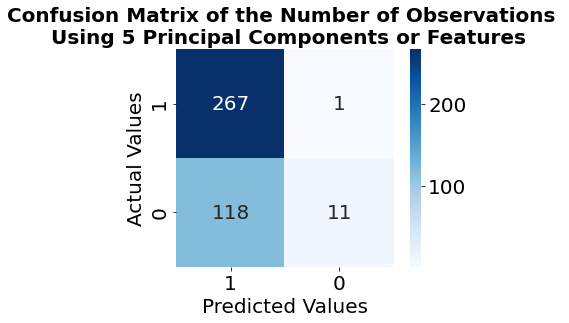

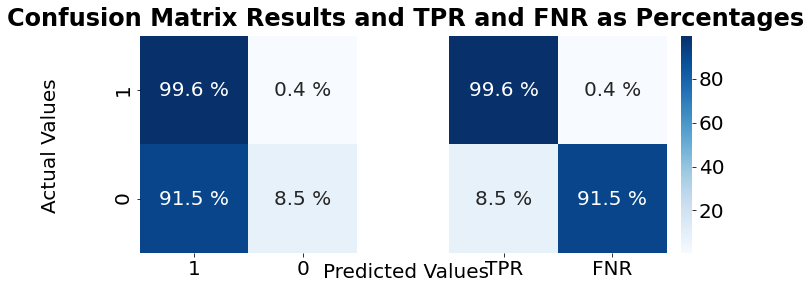


--- NB Result ---

Classification report is as follows:

              precision    recall  f1-score   support

         1.0       0.69      1.00      0.82       268
         0.0       0.92      0.09      0.16       129

    accuracy                           0.70       397
   macro avg       0.81      0.54      0.49       397
weighted avg       0.77      0.70      0.60       397



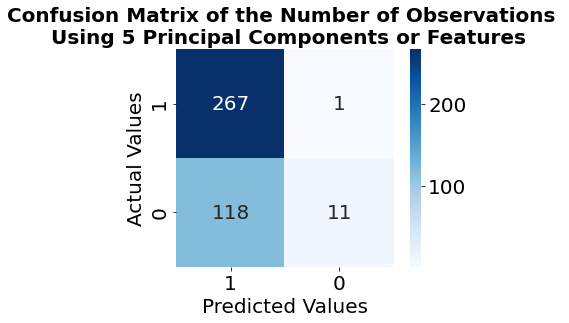

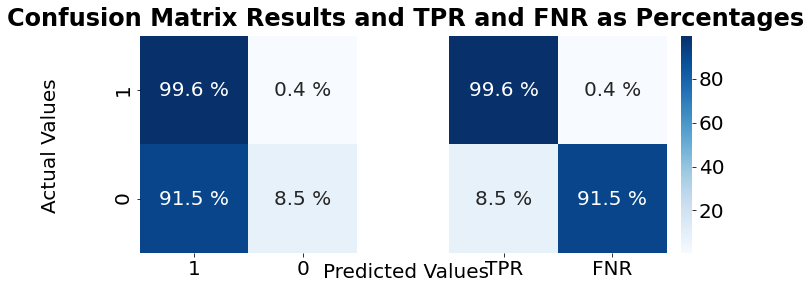

--- FS-LDA Result ---
Training time:  3.00e-03 s
Testing time:  0.00e+00 s
Total computational time:  3.00e-03 s
Prediction accuracy:  70.0 %

--- FS-NB Result ---
Training time:  9.97e-04 s
Testing time:  0.00e+00 s
Total computational time:  9.97e-04 s
Prediction accuracy:  70.0 %


In [12]:
# Feature Selection
LDA_training_time_fs, LDA_testing_time_fs, LDA_accuracy_fs, NB_training_time_fs, NB_testing_time_fs, NB_accuracy_fs = feature_selection(
    x_raw, xc)
print("--- FS-LDA Result ---")
print("Training time: ", "{:.2e}".format(LDA_training_time_fs), "s")
print("Testing time: ", "{:.2e}".format(LDA_testing_time_fs), "s")
print("Total computational time: ",
      "{:.2e}".format(LDA_training_time_fs + LDA_testing_time_fs), "s")
print("Prediction accuracy: ", LDA_accuracy_fs, "%")
print("")
print("--- FS-NB Result ---")
print("Training time: ",
      "{:.2e}".format(NB_training_time_fs), "s")
print("Testing time: ",
      "{:.2e}".format(NB_testing_time_fs), "s")
print("Total computational time: ",
      "{:.2e}".format(NB_training_time_fs + NB_testing_time_fs), "s")
print("Prediction accuracy: ", NB_accuracy_fs, "%")

**Discussions**

Based on the results, Feature Selection using LDA, and Naïve Bayes classifier, had the most accuracy in the prediction with a prediction accuracy of 70.0%. The classification accuracy for PCA (54.9% using LDA and 51.9% using Naïve Bayes) was lower than that with feature selection. One reason that may have led to this result was that PCA assumed that the attributes with highest variances contained the most important information about the data, however, this may not always be true. In contrast, feature selection trained and tested each attributes selecting features that resulted in the least number of errors when classified. As a result, the accuracy using feature selection was higher than that using PCA. 

Moreover, computation time for using PCA scores and key features from feature selection was similar for the naïve bayes classifier however, it took longer to classify the testing data using the LDA classifier for PCA scores than for feature selected key features. This could have been due to the computation of large numbers since the scores represent that largest Eigenvalues and corresponding Eigenvectors.

Lastly, regardless of the method, PCA vs Feature Selection, there was a large portion of Type I errors identified during classification meaning that most testing data are falsely predicted as 1 (being productive), while it was the opposite.
This could have been due to selecting a dataset with a significant amount of missing data in some of the attributes. Some of the missing information, although replaced with zero, was most likely not zero. As a result, the predictions were
negatively impacted.